# Descriptive analysis

## Outline

    1. Load libraries
    2. Load and prepare data
    3. Summary statistics
    4. Plots

## 1. Load libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np

# Calculation and model building
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa.stattools, statsmodels.graphics.tsaplots
from sklearn.metrics import mean_absolute_error

# Plotting
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('seaborn-paper')
%matplotlib inline

import seaborn as sns
sns.set_style('dark')

## 2. Load and prepare data

In [2]:
# Load Data
df = pd.read_csv("C:/Users/alexl/Desktop/MT/03_Data/Simulation_Alex/ProductionConsumption_first_11.csv", sep=",")

In [3]:
# add date information
import datetime

#datetime(year, month, day, hour)
a = datetime.datetime(2009, 10, 10, 1)

numsteps = len(df)
dateList = []
for x in range (0, numsteps):
    dateList.append(a + datetime.timedelta(hours = x))
start_date = "10/10/2009" # change when switching dataset

df['date'] = dateList
df['date1'] = dateList
df.columns = ['slot', 'dow','hour', 'production', 'consumption', 'temp', 'wind', 'cloud', 'date', 'date1']

df['consumption'] = df['consumption']*(-1)

#df_indexed = df
df.set_index('date', inplace=True)
#df_indexed.tail()

## 3. Summary statistics

In [4]:
# Summary statistics
df[['production', 'consumption', 'temp', 'wind', 'cloud']].describe()

,production,consumption,temp,wind,cloud
count,19441.000000,19441.000000,19441.000000,19441.000000,19441.000000
mean,9.512297,51.158948,10.009789,4.266447,0.663623
std,10.432226,11.839017,6.781285,2.496271,0.421762
min,0.000000,22.962400,-10.900000,0.000000,0.000000
25%,3.707800,42.076100,5.200000,2.000000,0.125000
50%,6.938300,51.134300,10.200000,4.000000,1.000000
75%,11.596400,59.026500,15.100000,6.000000,1.000000
max,72.091600,105.662000,33.700000,16.000000,1.000000


### Correlations between variables

In [5]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)

# calculate Pearson's correlation
corr_temp, _ = pearsonr(df['temp'],df['consumption'])
corr_wind, _ = pearsonr(df['wind'],df['consumption'])
corr_cloud, _ = pearsonr(df['cloud'],df['consumption'])
print('Pearsons correlation between consumption and temperature: %.3f' % corr_temp)
print('Pearsons correlation between consumption and wind: %.3f' % corr_wind)
print('Pearsons correlation between consumption and cloud: %.3f' % corr_cloud)

Pearsons correlation between consumption and temperature: -0.177
Pearsons correlation between consumption and wind: 0.088
Pearsons correlation between consumption and cloud: 0.017


## 4. Plots
### Plot one year with 24 hour rolling average

In [6]:
# Extract data for year 2010
df_mask = (df['date1']>'2009-12-31') & (df['date1']<'2011-01-01')
df_year_2010=df.loc[df_mask].copy()

In [7]:
# Calculate 24h rolling average
df_year_2010['consumption_daily_ave'] = df_year_2010.consumption.rolling(24).mean().shift(-12)

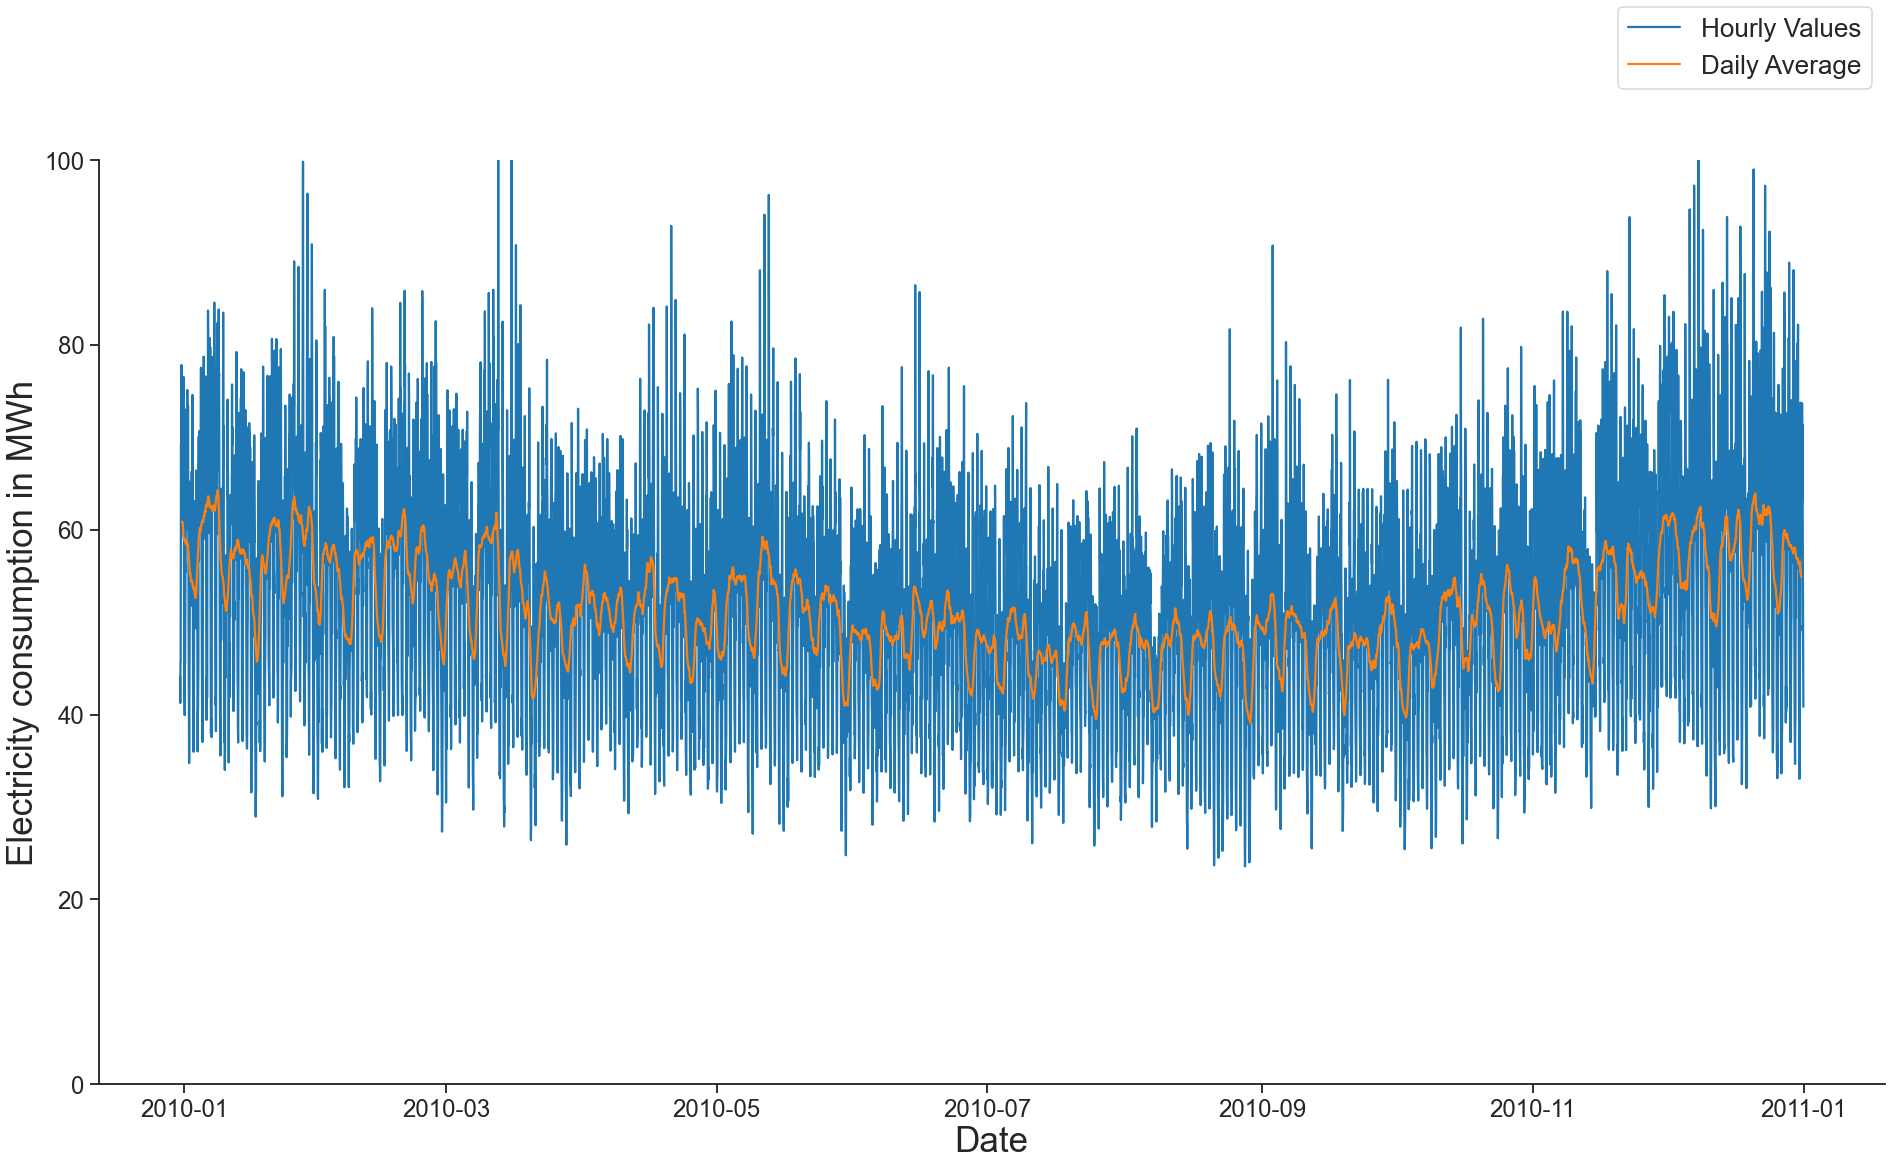

In [27]:
# Plot Electricity consumption over one year including a 24 hour rolling average
sns.set_context("talk")
sns.set_style('ticks')

# set figure size
plt.figure(figsize=(32,17))

# Time series plot with Seaborn lineplot() with label
pxd = sns.lineplot(x="date1",y="consumption",
             label="Hourly Values", data=df_year_2010,
             ci=None, color = 'tab:blue')

# 7-day rolling average Time series plot with Seaborn lineplot() with label
pxd = sns.lineplot(x="date1",y="consumption_daily_ave",
             label="Daily Average",
             data=df_year_2010,
             ci=None, color = 'tab:orange')

# set axis labels
plt.setp(pxd.get_legend().get_texts(), fontsize='25') 
plt.xlabel("Date", size=35)
plt.ylabel("Electricity consumption in MWh", size=35)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)
pxd.set(ylim=(0, 100))
plt.legend(loc='upper right', fontsize=26, bbox_to_anchor=(1, 1.18))
sns.despine()

#### Calculate average consumption summer and winter

In [9]:
# df_summer
df_mask = (df['date1']>'2010-05-31') & (df['date1']<'2010-07-01')
df_summer=df.loc[df_mask]
avg_consumption = round(np.mean(df_summer['consumption']), 2)
print('In summer months, the average consumption is: {} MWh.'.format(avg_consumption))

In summer months, the average consumption is: 48.66 MWh.


In [10]:
# df_summer
df_mask = (df['date1']>'2010-05-31') & (df['date1']<'2010-07-01')
df_winter=df_year_2010.loc[-df_mask]
avg_consumption = round(np.mean(df_winter['consumption']), 2)
print('In winter months, the average consumption is: {} MWh.'.format(avg_consumption))

In winter months, the average consumption is: 51.7 MWh.


### Plot one week of data

In [11]:
# Percentage difference summer and winter
df_mask = (df['date1']>'2010-06-07') & (df['date1']<'2010-06-14')
df_one_week=df.loc[(df['date1']>'2010-06-07') & (df['date1']<'2010-06-14')]


In [12]:
df_one_week

,slot,dow,hour,production,consumption,temp,wind,cloud,date1
date,,,,,,,,,
2010-06-07 01:00:00,5761,1,1,7.0126,40.0384,14.4,6,1.00,2010-06-07 01:00:00
2010-06-07 02:00:00,5762,1,2,7.0198,37.1278,13.4,5,1.00,2010-06-07 02:00:00
2010-06-07 03:00:00,5763,1,3,7.0086,36.0662,13.7,4,1.00,2010-06-07 03:00:00
2010-06-07 04:00:00,5764,1,4,5.0390,33.8306,14.3,4,0.75,2010-06-07 04:00:00
2010-06-07 05:00:00,5765,1,5,5.0394,40.2095,14.7,6,1.00,2010-06-07 05:00:00
...,...,...,...,...,...,...,...,...,...
2010-06-13 19:00:00,5923,7,19,5.1780,52.7441,14.8,2,1.00,2010-06-13 19:00:00
2010-06-13 20:00:00,5924,7,20,0.0000,50.2413,13.1,2,1.00,2010-06-13 20:00:00
2010-06-13 21:00:00,5925,7,21,0.0000,48.7671,12.6,2,1.00,2010-06-13 21:00:00


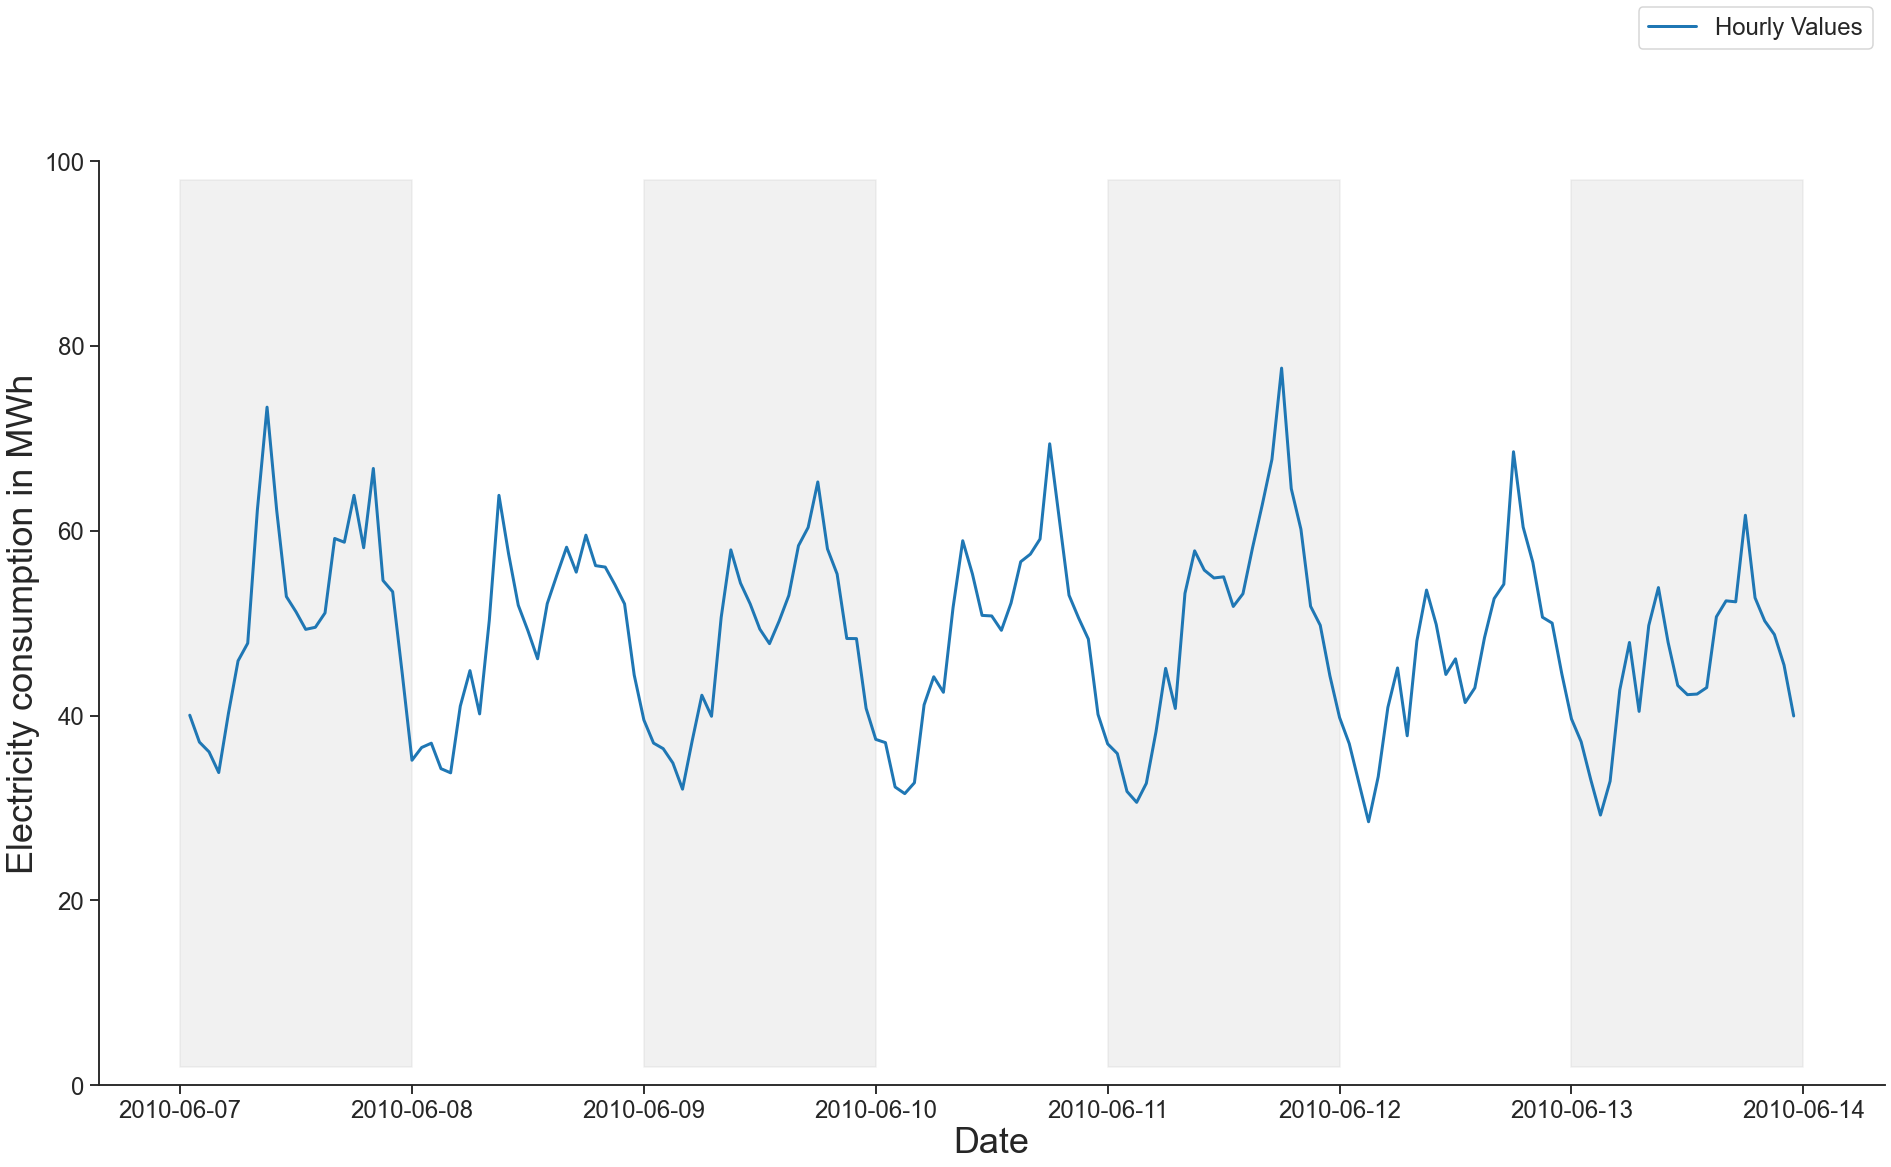

In [26]:
# bigger plot elements suitable for giving talks
sns.set_context("talk")
sns.set_style('ticks')
# set figure size
fig, ax = plt.subplots(figsize=(32,17))
# Time series plot with Seaborn lineplot() with label
pxd = sns.lineplot(x="date1",y="consumption",
             label="Hourly Values", data=df_one_week,
             ci=None, color = 'tab:blue', linewidth = 3)

# set axis labels
plt.setp(pxd.get_legend().get_texts(), fontsize='25') 
plt.xlabel("Date", size=36)
plt.ylabel("Electricity consumption in MWh", size=36)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)

# add shades on days
ax.axvspan('2010-06-07 00:00:00', '2010-06-08 00:00:00',0.02,0.98, alpha=0.1, color='tab:grey')
ax.axvspan('2010-06-09 00:00:00', '2010-06-10 00:00:00',0.02,0.98, alpha=0.1, color='tab:grey')
ax.axvspan('2010-06-11 00:00:00', '2010-06-12 00:00:00',0.02,0.98, alpha=0.1, color='tab:grey')
ax.axvspan('2010-06-13 00:00:00', '2010-06-14 00:00:00',0.02,0.98, alpha=0.1, color='tab:grey')

pxd.set(ylim=(0, 100))
plt.legend(loc='upper right', fontsize=24, bbox_to_anchor=(1, 1.18))
sns.despine()


### Plot autocorrelation of variables

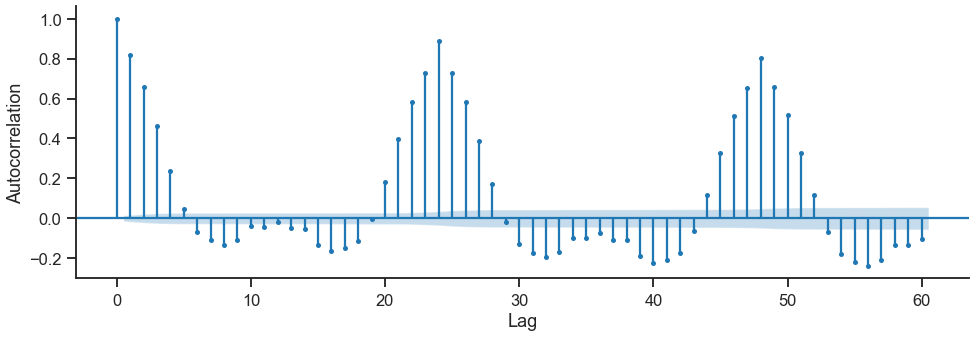

In [14]:
# Autocorrelation of the variable consumption
plt.rc("figure", figsize=(16,5))
acf_ts = df['consumption'].to_numpy()
acf_plot = plot_acf(acf_ts, lags=60, title = '')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
sns.despine()
plt.show()

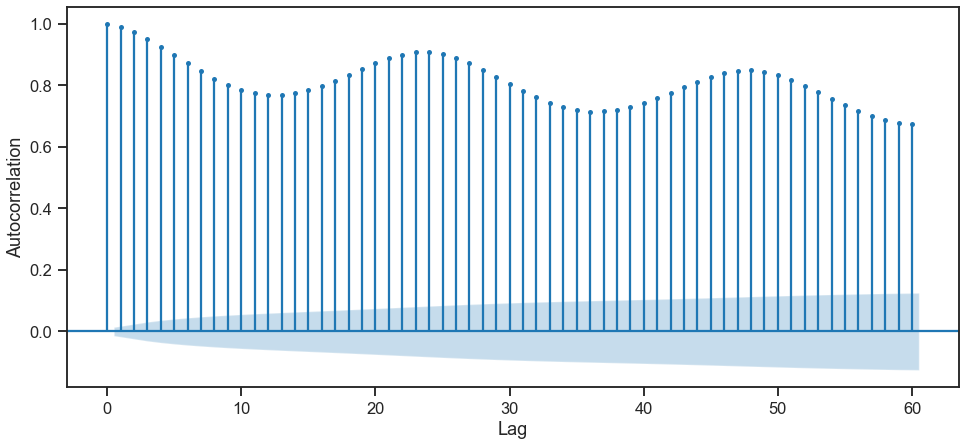

In [15]:
#Autocorrelation of the variable temperature
plt.rc("figure", figsize=(16,7))
acf_ts = df['temp'].to_numpy()
acf_plot = plot_acf(acf_ts, lags=60, title = '')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

### Boxplot of daily electricity consumption

In [16]:
def transform_to_windows(data, window, load_type='consumption'):
    
    #from the original datetime index create new columns with each of the year, month, day, and hour.
    data.loc[:,'year'] = data.index.year
    data.loc[:,'month'] = data.index.month
    data.loc[:,'day'] = data.index.day
    data.loc[:,'hours'] = data.index.hour
    
    #construct datetimes from the split year, month, day columns
    data.loc[:,'date'] = pd.to_datetime(data.loc[:,['year', 'month', 'day']], format='%Y-%m-%d', errors='ignore')
    
    #set the index to dates only
    data = data.set_index(pd.DatetimeIndex(data['date']))
    
    #drop non target columns 
    data = data.loc[:,[load_type, window]]
    
    #pivot the table into the format Date h0, h1, ...h23
    data = data.pivot(columns=window, values=load_type)
    
    return data

In [17]:
def rename_cols(data, shift, label):
    
    cols = data.columns
    
    cols_list = []
    
    for idx, col in enumerate(cols):
        
        new_col = label + str(idx)
        
        cols_list.append(new_col)
        
    data.columns = cols_list
    
    return data

### Boxplot showing electricity consumption per day of week

In [18]:
# Get average consumption for each recorded day
df_hourly = pd.DataFrame(df['consumption'].resample('D').mean())
df_hourly['dow'] = df_hourly.index.weekday
demand_daily_temp = transform_to_windows(df_hourly, window = 'dow')
demand_daily = rename_cols(demand_daily_temp, 3, label = 'day_')

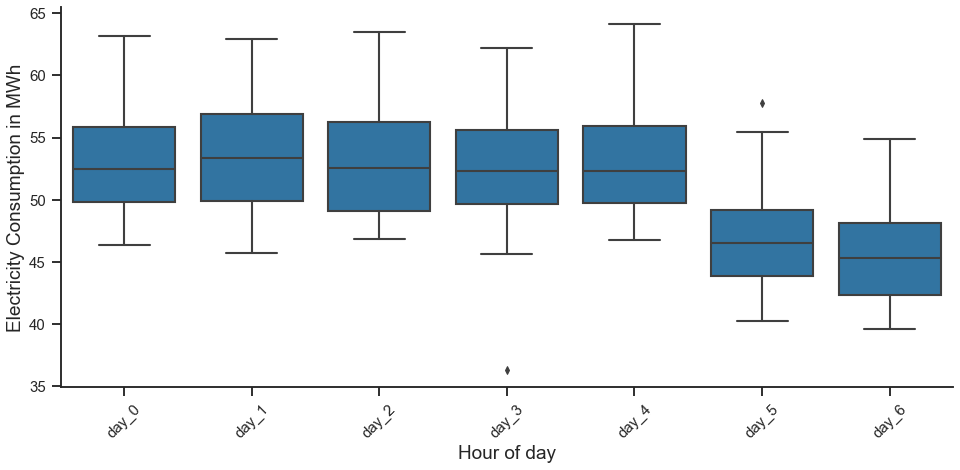

In [19]:
#fig = plt.figure(figsize=(16,7))
fig, ax = plt.subplots(figsize=(16,7))
pxd = sns.boxplot(data=demand_daily, color = 'tab:blue',
                  linewidth=2.1)
#demand_hourly.boxplot(sym='')
plt.xlabel('Hour of day', size=19)
plt.ylabel('Electricity Consumption in MWh', size=19)
ax.tick_params(axis='both', labelsize=15)
plt.xticks(rotation=45)
sns.despine()

#### Calculate interquartile ranges per day of week

In [20]:
# Calculate interquartile ranges per day of week
import numpy
demand = demand_daily.iloc[:,0]
x = [~numpy.isnan(demand)]
q3, q1 = np.percentile(demand_daily.iloc[:,0], [75, 25])

In [21]:
# create list with interquartile range per day
interquart_ranges = list()
for i in range(len(demand_daily.columns)):
    x = demand_daily.iloc[:,i]
    x = x[~numpy.isnan(x)]
    q3, q1 = np.percentile(x, [75, 25])
    iqa = q3-q1
    interquart_ranges.append(iqa)

[6.099054166666662,
 6.95934583333333,
 7.1998874999999956,
 5.9419750000000064,
 6.137291666666663,
 5.30872291666666,
 5.73458333333334]

In [22]:
# calculate average non-weekend and weekend
iqa_non_weekend = round(np.mean(interquart_ranges[0:5]), 4)
iqa_weekend = round(np.mean(interquart_ranges[6:8]), 4)

print('The average interquartile range is {} on non-weekend days and {} on weekend days.'.format(iqa_non_weekend, iqa_weekend))

The average interquartile range is 6.4675 on non-weekend days and 5.7346 on weekend days.


### Boxplot showing electricity consumption per hour of day

In [23]:
#transform the data into hourly windows
energy_data_transformed = transform_to_windows(df, window = 'hours')

#rename the columns
demand_hourly = rename_cols(energy_data_transformed, shift=0, label = 'hour_')

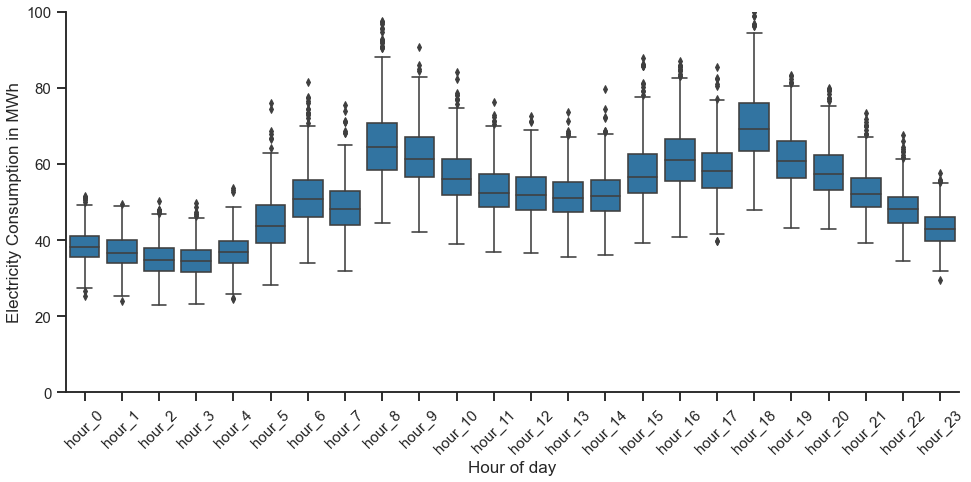

In [24]:
# Plot figure
fig, ax = plt.subplots(figsize=(16,7))
pxd = sns.boxplot(data=demand_hourly, color = 'tab:blue',
                  linewidth=1.6)
#demand_hourly.boxplot(sym='')
plt.xlabel('Hour of day', size=17)
plt.ylabel('Electricity Consumption in MWh', size=17)
ax.tick_params(axis='both', labelsize=15)
pxd.set(ylim=(0, 100))
plt.xticks(rotation=45)
sns.despine()